
# CS110 Fall 2019 - Assignment 3
# Decoding relationships between genes

## Submission Materials
Your assignment submission needs to include the following resources:

1. A PDF file must be the first resource and it will include all the answers to the questions above. 
2. Name the  PDF file: `<your_ name>.pdf`. For example, if you are a student name Dumbledore, your PDF file must be named “Dumbledore.pdf”. 
3. Make sure that you submit a neat, clearly presented, and easy-to-read PDF,  
4. Your PDF **must also** include the Python code as an appendix at the end. This will facilitate the process of writing feedback by anchoring the feedback to specific portions of the Python code using the grader tool.
5. Your second resource must be a single Python/Jupyter Notebook with your answers written in the assignment template provided.
    * Name this Jupyter Notebook also using the same convention as for the PDF file;  <student_name>.ipynb. For example, if you’re Dumbledore, your  Jupyter Notebook must be named “Dumbledore.ipynb”. 

## Notes on Grading Rubrics
* This is a strictly individual assignment. Everything you submit must reflect your own writing both in the text and Python programming.
* The assignment will be graded on the quality of your report, as well as: 
    * the LOs tagged in each question. 
    * the HCs **#professionalism** and **#algorithms** based on a holistic view of the assignment.

Please consult the rubrics for these LOs to optimally align your approach to the rubrics.
* As per the course’s policy on the syllabus, you will need to footnote at least **three** HCs by including a meaningful justification of the application of each HC. 
You will need to mindfully address how the HC enabled you to complete part of your work on this assignment. Please refer to refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work.
* You will receive a warning on the first two weak applications of the HCs used in assignments since the beginning of the course. The counting system is cumulative, and these first two warnings will not generate a grade on the HC. The third and subsequent warnings will be graded on the specific HC using the HCs corresponding rubric. Please check what your HC counter is and prepare accordingly for this assignment.


## Overview
Gene Mutation is a prevailing and computationally intensive research topic in Genetics. For this assignment, assume that you have been hired by a biotechnology company to work on a gene mutation research project, and your first task is to write a Python program to investigate a genealogical mutation sequencing.


In this program, a gene is described by a string of letters, with a letter being chosen from the set ${A, C, G, T}$. A mutation is relatively rare but it can occur in which there is a small probability of either inserting a new character, deleting an existing character, or changing to a new character randomly. We can refer to these probabilities by $p_i, p_d$, and $p_c$, respectively.


Now, suppose the starting point is a given string that undergoes a mutation process. This mutation created two other strings, the child strings of the first string. Each of these two new strings can undergo mutations by which they will change from their parent. In turn, the two-child strings, mutate and create 2 new substrings each, resulting in four grandchild strings from the original gene sequencing string. We can easily visualize the sequence of mutations if we were to draw a genealogy binary tree relating strings to their parent and grandparent strings.

As a result of these mutations, we now have 7 strings but unfortunately, the order of the strings has been lost due to a glitch in the gene sequencing generation program. Therefore, your first task in the project is to recover the genealogy tree for the following set of 7 strings labelled with lowercase letters:


`('a','ACAATCCTCGCGCAGAACAACACTTTTAACGTATCCTTGATCATTTTCCGTCCTAAGTCGAATT')`,
`('b','CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG')`,
`('c','TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT')`,
`('d','AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA')`,
`('e','GCGTCCGCAACGTTGGGCTTCAAACGTACCGAGTTTCCGATGGATTATATTGGACAGATGATCCTACCAAGTGCCTTTTCTAACAGCTCGGTAATGTC')`,
`('f','ACAGACTGCGGAAGCGCGACGCTTGATTTCGGCAGCCCCACGGATGGTACATAACTGCTGTTACCTACGCTACCTGCTAAACACTTCCCGCTCTG')`,
`('g','ACGAGCAGCCACAGCACACCGTTAACTATGTGATAATCCCTCATGCGATG')`

Henceforth, the set of strings created with the gene-sequencing generation program will be referred to as `Set_Strings`.

# Assignment Questions

Each of the questions below will be graded on the CS110 LOs included inside square brackets: 

## Part A [#responsibility] [appropriate LO for the make-up work] 

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to session 12.2 (inclusively).

Submit this screenshot as a PNG file on your Python or Jupyter notebook. 


## Part B. Consider `Set_Strings` to answer the following questions below:

### Question 1. [#DynamicProgramming, #PythonProgramming, #CodeReadability] 

Write Python code which, given any two arbitrary strings, outputs the length of the Longest Common Subsequence (LCS) for those two strings. Make sure to include a number of test cases that demonstrate that your code is correct.


In [2]:
#importing the required libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx
from drawtree import draw_level_order

In [3]:
# adapted from "Introduction to Algorithms" 3rd edition by Cormen et al.
# and https://www.geeksforgeeks.org/longest-common-substring/
def longestCommonSubsequence(x, y):
    """
    Function that gives us the length of the longest common subsequence from a pair of
    strings in O(mn) time where m and n are the lengths of the strings 
    
    Inputs:
    Pair of strings, x & y
    """
    #adding an argument to reject inputs that are not strings
    if type(x) != str or type(y) != str:
        raise TypeError('Inputs must be strings')

    # the lengths of strings x & y
    m = len(x)
    n = len(y)

    # construct an array of size (m+1)(n+1)
    c = [[0 for x in range(n + 1)] for y in range(m + 1)]
    # the first loop iterates from x[0] to x[m - 1]; 
    # the second loop iterates from y[0] to y[n - 1]
    for i in range(m):  
        for j in range(n): 
            if x[i] == y[j]:
                c[i + 1][j + 1] = c[i][j] + 1  # take x[i] and y[j] for LCS
            elif c[i][j + 1] >= c[i + 1][j]:   # x[i] not in LCS
                c[i + 1][j + 1] = c[i][j + 1]
            else:
                c[i + 1][j + 1] = c[i + 1][j]  # y[j] not in LCS
    return c[m][n]                             # return length of LCS

#test cases
assert(longestCommonSubsequence('ABCDGH', 'AEDFHR') == 3)
assert(longestCommonSubsequence('ABC', 'AC')== 2)
assert(longestCommonSubsequence('AGGTAB', 'GXTXAYB') == 4)
assert(longestCommonSubsequence('AAAAAA', 'AAAAAA') == 6)

In [4]:
assert(longestCommonSubsequence('ABCBDAB', 'BDCABA')==4)

### Question 2. [#DynamicProgramming] 

How many LCSs are there in Set_Strings? Generate the matrix of the lengths of the LCS for every pair of strings in Set_Strings. The matrix should be cast as a two-dimensional numpy array. **Store this 2D numpy array to a variable named `C`**.

Your 2D array `C` should have dimension (7,7) and `C[i,j]` should give the length of the LCS for the $i-$th and $j-$th strings. For example, `C[0,3]` gives the length of the LCS for string `a` and string `d`.

In [5]:
Set_Strings = [
    ('ACAATCCTCGCGCAGAACAACACTTTTAACGTATCCTTGATCATTTTCCGTCCTAAGTCGAATT'),
    ('CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG'),
    ('TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT'),
    ('AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA'),
    ('GCGTCCGCAACGTTGGGCTTCAAACGTACCGAGTTTCCGATGGATTATATTGGACAGATGATCCTACCAAGTGCCTTTTCTAACAGCTCGGTAATGTC'),
    ('ACAGACTGCGGAAGCGCGACGCTTGATTTCGGCAGCCCCACGGATGGTACATAACTGCTGTTACCTACGCTACCTGCTAAACACTTCCCGCTCTG'),
    ('ACGAGCAGCCACAGCACACCGTTAACTATGTGATAATCCCTCATGCGATG')
]


data = []  # initialize empty list
# for loop that creates a 7*7 numpy array that stores the 
# length of the LCS for the i-th and j-th strings in Set_Strings
for i in range(0,7):
    data.append([])
    for j in range(0,7):
        data[i].append(longestCommonSubsequence(Set_Strings[i], Set_Strings[j]))
#storing the 2D numpy array into variable C        
C = np.array(data)
C

array([[64, 45, 49, 48, 50, 48, 38],
       [45, 74, 47, 46, 59, 58, 45],
       [49, 47, 81, 48, 57, 57, 39],
       [48, 46, 48, 75, 53, 54, 38],
       [50, 59, 57, 53, 98, 61, 43],
       [48, 58, 57, 54, 61, 95, 45],
       [38, 45, 39, 38, 43, 45, 50]])

### Question 3. [#DataStructures]

Manually examine the matrix you obtained in 2, and infer the genealogical relationships between strings (i.e., explicitly identify the great-grandparent, grandparent, parent and child strings), and draw the resulting genealogy binary tree associated with `Set_Strings`.


Now that we have stored the 2D numpy array into `C`, we can proceed to using the information to infer the relationship between the strings. First we observe that the length of each of the seven strings given varies. Therefore, making comparisons using the absolute values may be misleading. For this reason, we normalize the variables in `C` by dividing each column with the value of its diagonal. Let's call the resulting values in each cell the LCS-share. For easier interpretation, we represent this information in a heatmap (Figure 1).   



In [6]:
# similar to the code in the cell above with the only difference being we
# normalize the the variables in C and store the normalized LCS lengths into C_.
# we then round the values to 3dp
data_ = []
for i in range(0,7):
    data_.append([])
    for j in range(0,7):
        data_[i].append(longestCommonSubsequence(Set_Strings[i], Set_Strings[j])/len(Set_Strings[i]))
C_ = np.array(data_)
np.round(C_, 3)

array([[1.   , 0.703, 0.766, 0.75 , 0.781, 0.75 , 0.594],
       [0.608, 1.   , 0.635, 0.622, 0.797, 0.784, 0.608],
       [0.605, 0.58 , 1.   , 0.593, 0.704, 0.704, 0.481],
       [0.64 , 0.613, 0.64 , 1.   , 0.707, 0.72 , 0.507],
       [0.51 , 0.602, 0.582, 0.541, 1.   , 0.622, 0.439],
       [0.505, 0.611, 0.6  , 0.568, 0.642, 1.   , 0.474],
       [0.76 , 0.9  , 0.78 , 0.76 , 0.86 , 0.9  , 1.   ]])

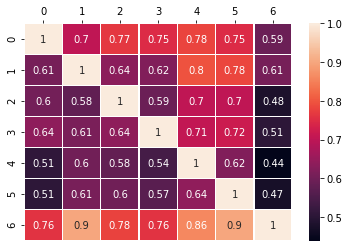

Figure 1. Heat map of the LCS-share.


In [7]:
# heatmap to represent C_ for easier analysis
ax = sns.heatmap(C_, linewidth=0.5, annot = True)
ax.xaxis.set_ticks_position('top')
plt.show()
print ("Figure 1. Heat map of the LCS-share.")

Let's proceed to infer the relationship between the strings:
* We'll begin by restating what we know about know about our set of 7 strings. First, we expect to have one parent gene, two children genes, and four grandchildren genes. This gives us three parent-child relationships. We observe that when comparing the same string to itself, the LCS is the length of the string itself. 

* From the instructions, we know that we had an initial gene from which the other genes were created from after undergoing mutation. Since the resulting genes borrow a lot of their characteristics from the initial gene, it goes to reason that the string of genes that has shows the greatest resemblance to be the parent gene. We find this by finding the sums of the LCS-share per row and get that `G` has the greatest total LCS-share value (5.960). This is followed by `a`=(5.344),`b`=(5.054),`d`=(4.827),`c`=(4.667),`f`=(4.400),`e`=(4.296) as shown in the calculation below



In [8]:
print ("The mean LCS-share of string a is %.3f." % (C_[0].sum()))
print ("The mean LCS-share of string b is %.3f." % (C_[1].sum()))
print ("The mean LCS-share of string c is %.3f." % (C_[2].sum()))
print ("The mean LCS-share of string d is %.3f." % (C_[3].sum()))
print ("The mean LCS-share of string e is %.3f." % (C_[4].sum()))
print ("The mean LCS-share of string f is %.3f." % (C_[5].sum()))
print ("The mean LCS-share of string g is %.3f." % (C_[6].sum()))

The mean LCS-share of string a is 5.344.
The mean LCS-share of string b is 5.054.
The mean LCS-share of string c is 4.667.
The mean LCS-share of string d is 4.827.
The mean LCS-share of string e is 4.296.
The mean LCS-share of string f is 4.400.
The mean LCS-share of string g is 5.960.


The resulting geneaology tree is as follows:

Figure 2. The inferred relationship among the seven genes.


/Users/denniskageni/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/denniskageni/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


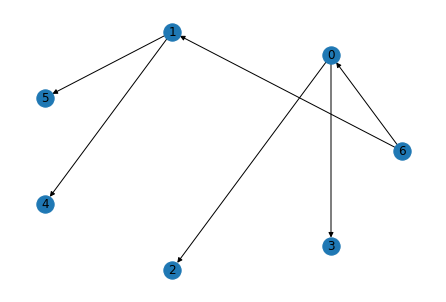

In [9]:
G = nx.DiGraph()
  
G.add_edge(6, 0)
G.add_edge(6, 1)
G.add_edge(1, 5)
G.add_edge(1, 4)
G.add_edge(0, 2)
G.add_edge(0, 3)


nx.draw_shell(G, with_labels=True)
print ("Figure 2. The inferred relationship among the seven genes.")
plt.show()

In [10]:
from binarytree import build
values_dict = {0: "a", 1: "b", 2: "c", 3: "d", 4: "e", 5: "f", 6: "g"}
values = [6,0,1,3,2,5,4]
root = build(values)
print(root)


    __6__
   /     \
  0       1
 / \     / \
3   2   5   4



In [11]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Question 4. [#PythonProgramming, #CodeReadability, #DynamicProgramming or #GreedyAlgorithms] 

Write an algorithm in Python for the general case, which takes as input $N$ sequencing strings and outputs a genealogy binary tree associated with the $N$ strings that best exposes the relationships between them.

The algorithm that attemps to infer the tree relationships in a gene pool is implemented in the following steps:
1. For every pair of genes, use `longestCommonSubsequence` to find their LCS and store the values in a N*N matrix where N is the length of strings in the gene pool
2. Normalize the N*N matrix by dividing each of the values in the cell columnwise by the value of the diagonal such that our resulting matrix has 1s along it's diagonal
3. Find the sum of each row of the matrix. The row with the highest sum is the root gene
4. Build the geneology tree by taking the next pair of highest row sums that are yet to be assigned and adding the associated string, breath-first, to the tree. 

In [12]:
def geneology_tree(Strings):
    """
    Function that takes as input 𝑁 sequencing strings and outputs a genealogy binary tree 
    associated with the 𝑁 strings that best exposes the relationships between them.
    
    Runs in 𝑂(𝑁^2𝑚𝑛) time
    """
    N = len(Strings)
    # lcs_id creates an empty list to store the identification keys for 
    # each string for the purpose of idenfication
    lcs_id = [i for i in range(N)] 
    # lcs_values and normalized_lcs_values create empty N*N matrices; 
    # we use lcs_values to store the LCS values of each string
    # and normalized_lcs_values stores the normalized LCS values of each string
    lcs_values = np.array([[.0 for _ in range(N)] for _ in range(N)])
    normalized_lcs_values = np.array([[.0 for _ in range(N)] for _ in range(N)])
    # a for loop that finds the number of strings in the gene pool (X) and uses it to
    # create a X*X matrix; calculates the LCS of each pair of strings, 
    # stores it in the matrix and normalizes the matrix
    # we then find the sum of each row and store the values in a new column "Sum"
    # and sort the values in the sum column in descending order
    for i in range(len(Strings)):
        for j in range(len(Strings)):
            lcs_values[i,j]=longestCommonSubsequence(Strings[i], Strings[j])/len(Strings[i]) 
        # normalizes the LCS matrix and storing the values in a table
        normalized_lcs_values[i,:]=lcs_values[i,:]/lcs_values[i,i]
        LCS_table=pd.DataFrame(normalized_lcs_values[i,:] for i in range(len(Strings)))
        LCS_table["Sum"]=LCS_table.sum(axis=1)
        LCS_table["Index"]=lcs_id
        LCS_table.set_index("Index")
        LCS_table = LCS_table.sort_values(by='Sum', ascending=0)
    # table that contains the resulting n*n matrix with additional columns 
    # for the sum and index (which stores the rank of the sum values)
    gene_rank = list(LCS_table["Index"]) 
    draw_level_order(str(gene_rank)) #draws the geneology tree
    #return LCS_table
    return gene_rank
geneology_tree(Set_Strings)

      6
     / \
    /   \
   /     \
  0       1
 / \     / \
3   2   5   4


[6, 0, 1, 3, 2, 5, 4]

In [13]:
Set_Strings_10 = [
    ('ACAATCCTCGCGCAGAACAACACTTTTAACGTATCCTTGATCATTTTCCGTCCTAAGTCGAATT'),
    ('CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG'),
    ('TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT'),
    ('AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA'),
    ('GCGTCCGCAACGTTGGGCTTCAAACGTACCGAGTTTCCGATGGATTATATTGGACAGATGATCCTACCAAGTGCCTTTTCTAACAGCTCGGTAATGTC'),
    ('ACAGACTGCGGAAGCGCGACGCTTGATTTCGGCAGCCCCACGGATGGTACATAACTGCTGTTACCTACGCTACCTGCTAAACACTTCCCGCTCTG'),
    ('ACGAGCAGCCACAGCACACCGTTAACTATGTGATAATCCCTCATGCGATG'),
    ('CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG'),
    ('TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT'),
    ('AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA')
]
    
geneology_tree(Set_Strings_10)

          6
         / \
        /   \
       /     \
      0       1
     / \     / \
    /   \   9   2
   /     \
  7       3
 / \     /
8   5   4


[6, 0, 1, 7, 3, 9, 2, 8, 5, 4]

In [14]:
Set_Strings_20 = [
    ('ACAATCCTCGCGCAGAACAACACTTTTAACGTATCCTTGATCATTTTCCGTCCTAAGTCGAATT'),
    ('CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG'),
    ('TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT'),
    ('AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA'),
    ('GCGTCCGCAACGTTGGGCTTCAAACGTACCGAGTTTCCGATGGATTATATTGGACAGATGATCCTACCAAGTGCCTTTTCTAACAGCTCGGTAATGTC'),
    ('ACAGACTGCGGAAGCGCGACGCTTGATTTCGGCAGCCCCACGGATGGTACATAACTGCTGTTACCTACGCTACCTGCTAAACACTTCCCGCTCTG'),
    ('ACGAGCAGCCACAGCACACCGTTAACTATGTGATAATCCCTCATGCGATG'),
    ('CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG'),
    ('TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT'),
    ('AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA'),
    ('ACAATCCTCGCGCAGAACAACACTTTTAACGTATCCTTGATCATTTTCCGTCCTAAGTCGAATT'),
    ('CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG'),
    ('TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT'),
    ('AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA'),
    ('GCGTCCGCAACGTTGGGCTTCAAACGTACCGAGTTTCCGATGGATTATATTGGACAGATGATCCTACCAAGTGCCTTTTCTAACAGCTCGGTAATGTC'),
    ('ACAGACTGCGGAAGCGCGACGCTTGATTTCGGCAGCCCCACGGATGGTACATAACTGCTGTTACCTACGCTACCTGCTAAACACTTCCCGCTCTG'),
    ('ACGAGCAGCCACAGCACACCGTTAACTATGTGATAATCCCTCATGCGATG'),
    ('CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG'),
    ('TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT'),
    ('AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA')
    
]
    
geneology_tree(Set_Strings_20)

                    6
                   / \
                  /   \
                 /     \
                /       \
               /         \
              /           \
             /             \
            16              0
           / \             / \
          /   \           /   \
         /     \         /     \
        /       \       1      11
       /         \     / \     / \
      10          7   19  8   12  2
     / \         / \
    /   \       9  13
   /     \     /
  17      3   14
 / \     / \
18  5   15  4


[6, 16, 0, 10, 7, 1, 11, 17, 3, 9, 13, 19, 8, 12, 2, 18, 5, 15, 4, 14]

### Question 5. [#ComputationalCritique] 

Write any strengths or weaknesses of your suggested algorithm.


Weaknessess:
1. The algorithm doesn't have a defined procedure to follow when we have similar row sums.
2. Errors can trickle down because there's no way to revisit choices the algorithm makes
3. Requires extra storage. This can be corrected by implementing a greedy version instead as it will still maintain the optimal substructure property

Strengths:
1. The algorithm runs in polynomial time which is better than the exponential time complexity we would require to implement a brute force version of the same algorithm

### Question 6. [#ComplexityAnalysis] 

What is the computational complexity of your solution to produce genealogy binary trees? You can consider M to be the length of a gene, and N the number of genes.

1. Recall that `longestCommonSubsequence` has a complexity of $O(mn)$
2. We the have 2 for loops; i ={0,...,N} & j ={0,...,N} where for each (i,j), we call `longestCommonSubsequence`. This gives us a complexity of $O(N^2*m*n)$
3. Add N complexity for normalizing: $O(N^2mn + N)$
4. Add N complexity for normalizing: $O(N^2mn + N + N)$
5. We observe that the highest order term is $O(N^2mn)$
6. Therefore, our complexity is $O(N^2mn)$

### Question 7. [#ComputationalSolutions, #PythonProgramming, #CodeReadability] 

How would you estimate the probabilities of insertions, deletions, and mutations, $p_i, p_d,$ and $p_c$, respectively? (Hint: It is obvious that you don’t have enough data to obtain meaningful estimates for large datasets, but this small dataset has enough information for you to intuitively formulate estimates for $p_i, p_d,$ and $p_c$.). Make sure you include a working Python estimation that would take your algorithmic strategy into practice.

I would use a dynamic algorithm to find the edit distance. The edit distance is the minimum number of edit operations to transform a string x(which will be the parent gene sequence) into y (the child gene sequence). The possible operations are deletion (when there is a space in the child sequence), insertion (when there is a space in the parent sequence) or substitution (when there are two different characteres in the same position) of a single character or symbol. To estimate the probability of mutation we would take the number of possible mutations and divide them over the length of string, we would repeat the same for both insertion and deletion.

In [15]:
# edit_distance is adapted from https://www.codespeedy.com/minimum-edit-distance-in-python/
def edit_distance(x, y):
    """
    Function that calculates and returns the minimum number of insertions, substitutions 
    and deletions needed in order to transform string x into string y
    
    Has a time complexity of O(mn)
    
    """

    # rejects any non-String entries
    if type(x) != str or type(y) != str:
        raise TypeError('Inputs must be strings')

    # lenghts of the strings; will be used as the array dimensions
    m = len(x)
    n = len(y)

    # initialize a table to store results of subproblems
    string_matrix = [[0 for b in range(n + 1)] for c in range(m + 1)]

    # for loop that traverses the table
    for i in range(m + 1):
        for j in range(n + 1):
            # if string x is empty, the cost of transforming x to y is inserting every element of y into x
            if i == 0:
                string_matrix[i][j] = j
            # if string y is empty the cost of transforming x to y is deleting every element of x
            elif j == 0:
                string_matrix[i][j] = i
            # but if the last characters of x and y are equal, there's not much we can do
            # we ignore the last two characters and get the count of the remaining strings
            elif x[i - 1] == y[j - 1]:
                string_matrix[i][j] = string_matrix[i - 1][j - 1]
            # otherwise
            else:
                string_matrix[i][j] = 1 + min(string_matrix[i - 1][j - 1], # substitute operation
                                  string_matrix[i][j - 1],                 # insert operation
                                  string_matrix[i - 1][j])                 # delete operation

    # initializing i and j; and counting the number of insertions, deletions and substitution operations
    i = m
    j = n
    ins = 0   
    dels = 0  
    subs = 0  
#___________________________________________________________
# implemented the retracing code with the help of Hung Nguyen

    # while loop retraces the path that the algorithm took to turn X into Y
    while i != 0 and j != 0:
        # if the elements in x and y are equal, then no edits are needed
        # we decrement i and j
        if x[i - 1] == y[j - 1]:
            i -= 1
            j -= 1
        # but if the elements are different, we find the edit distance value prior to making a chance
        else:  
            value = string_matrix[i][j] - 1
             # If the algorithm took the substitution route
            if value == string_matrix[i - 1][j - 1]:  # if we substituted
                subs += 1
                i -= 1
                j -= 1

            elif value == string_matrix[i][j - 1]:    # if we inserted
                ins += 1
                j -= 1

            else:                                     # if we deleted
                dels += 1
                i -= 1
    # to find the probability we divide the insertion, deletion and substitution 
    # counts with the length of the larger string
    return ins/max(len(x),len(y)), dels/max(len(x),len(y)), subs/max(len(x),len(y))
# ________________________________________________
# implemented the probability estimation part with the help from Ahmed ElKattam

#estimating our probabilities for insertion, deletion and substitution

p_insertion = 0 
p_deletion = 0 
p_substitution = 0

# using the 6 parent-child relationships from question 2 and 3
# we find our probability by dividing the number of mutations (insertion, 
# deletions & substitution) operations with the length of the sequence itself

probability_storage=[edit_distance(Set_Strings[6],Set_Strings[1]),
                     edit_distance(Set_Strings[6],Set_Strings[0]), 
                     edit_distance(Set_Strings[1],Set_Strings[3]), 
                     edit_distance(Set_Strings[1],Set_Strings[5]), 
                     edit_distance(Set_Strings[0],Set_Strings[2]), 
                     edit_distance(Set_Strings[0],Set_Strings[4])]

for i in probability_storage: 
    p_insertion += i[0]/6
    p_deletion += i[1]/6 
    p_substitution += i[2]/6
    
print("My estimate for P(insertion) is",p_insertion*100,"%")
print("My estimate for P(deletion) is",p_deletion*100,"%")
print("My estimate for P(substitution) is",p_substitution*100,"%")


My estimate for P(insertion) is 22.01555703722579 %
My estimate for P(deletion) is 1.4044635398018857 %
My estimate for P(substitution) is 20.756545377577122 %


## HC Application
* #algorithms - In question 4, I implemented working code that takes as input 𝑁 sequencing strings and outputs a genealogy binary tree associated with the 𝑁 strings that best exposes the relationships between them in 𝑂(𝑁^2𝑚𝑛) time. I also included detailed explanations of the code.
* #breakitdown - question 4 involved implementing a working python code that at minimum executed the following subproblems: received 𝑁 sequencing strings as an input, initialized an N*N empty square matrix, run the `longestCommonSubsequence` function and stored the LCS_values in the matrix we had created, normalized the matrix, found the sums of each row of the matrix, ranked the sums in descending order and used the information to infer parent-child relationships. These steps, among others, culminated in the creation of a geneology tree that characterized the relationship between the input of strings we'd received
* #dataviz - in question 3, I plotted a heatmap to help examine the matrix C_. For question 3 and 4, I drew the resulting geneology trees from the `gene_rank` list. The visualizations helped derive a stratagy for using `longestCommonSubsequence` to infer the geneological relationship between strings and effectively present these using tree diagrams